
# Project:  No show appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and  we will be analysing data associated with appointment and in particular , we will be interested in finding trends among the Patients who  show up for their appointment and how they differed from the Patients who did not show up.and Question like # Does  the scholarship affect the date of the visit? ## what about Hypertension?.



## data dictionary 
***‘ScheduledDay’ tells us on what day the patient set up their appointment.

***‘Neighborhood’ indicates the location of the hospital.

***‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família

In [1]:
#imorting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in c:\users\dell\appdata\local\continuum\anaconda3\lib\site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#loading the dataset

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


. we can see that:

***there is a mistak of the pationt age (age=-1 !) # we will fix that later

***the mean of patiens age is 37 years old 

***the majority of them between 18 and 60 

In [5]:
df.shape

(110527, 14)

110527 rows and 14 columns

In [6]:
# chek  data types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is No missing data 

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No null values

In [8]:
df.duplicated().any()

False

No duplicated Rows

In [9]:
# removing the row of  patient age '-1'
df =df[df.Age >= 0]

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



## data cleaning
Let's make some adjustments to the columns:

In [11]:
#here we We dropped some unhelpful columns.
df.drop(['PatientId' ,'AppointmentID' ,'ScheduledDay', 'AppointmentDay' ] , axis=1 ,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


some column names need to Re-correcting



In [12]:
#Re-correcting  spelling of 'Handcap'
df.rename(columns={'Handcap':'Handicapped'} , inplace=True ) 


In [13]:
#Re-correcting  spelling of 'Hipertension'
df.rename(columns={'Hipertension':'Hypertension'} , inplace=True )

In [14]:
#Re-naming 'No-show' 
df.rename(columns={'No-show':'NO_show'} , inplace=True )

In [15]:
# number of patients 
df['NO_show'].count() #len

110526

In [16]:
df['NO_show'].value_counts()

No     88207
Yes    22319
Name: NO_show, dtype: int64

Who's gone  '88208'   more than not gone   '22319'

In [17]:
# make it easier to grap the stuts of the patient
noshow = df.NO_show == 'Yes'
show = df.NO_show == 'No'

In [18]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,NO_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


#What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

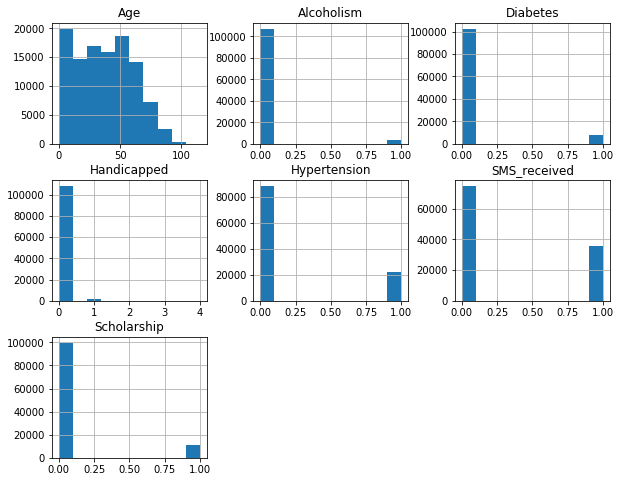

In [19]:
#histogram of the dataset
df.hist(figsize=(10,8));

#notes  

****Number of patients who recived 'SMS' is about  half who didnt 

****  Few patients didnt enrolled in Brasilian welfare program Bolsa Família    

**** most of the patients didnt complain about alcoholism ,handicapped and diabetes 

**** more than 20000 patient suffer from hypertention  

# Does  the scholarship affect the date of the visit? 

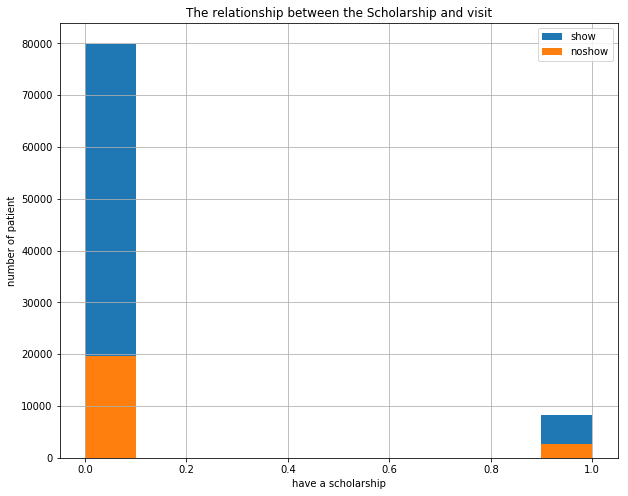

In [20]:
def bar_plot(col, title, xlabel):
    plt.figure(figsize=(10,8))
    df[col][show].hist(label='show')
    df[col][noshow].hist(label='noshow')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('number of patient')
    plt.legend();
    
bar_plot('Scholarship' , 'The relationship between the Scholarship and visit' ,'have a scholarship' )    

scholarship is insignificant

## what about Hypertension

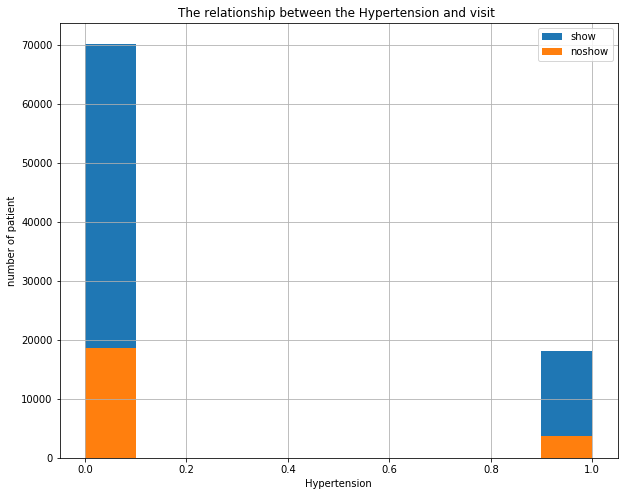

In [21]:
bar_plot('Hypertension' ,'The relationship between the Hypertension and visit ','Hypertension')

Hypertension is insignificant

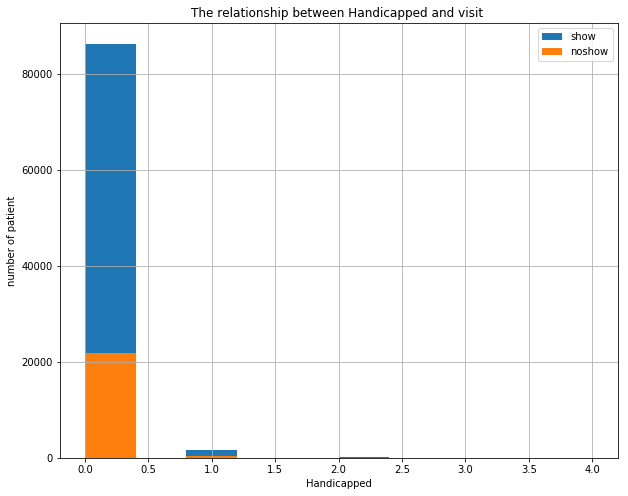

In [22]:
bar_plot('Handicapped' ,'The relationship between Handicapped and visit ', 'Handicapped')

Handicapped is insignificant

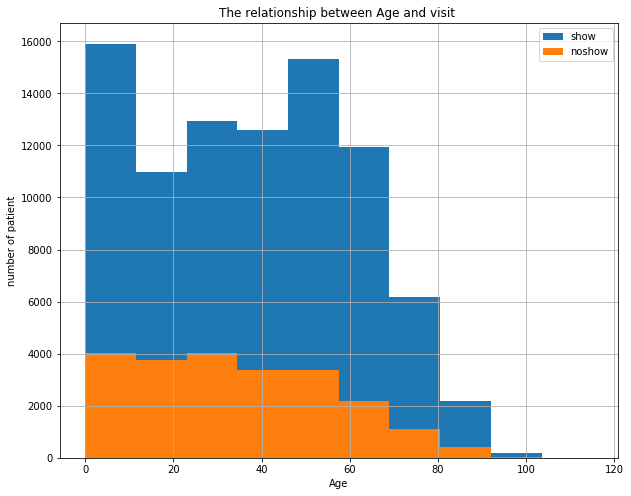

In [23]:
bar_plot('Age','The relationship between Age and visit ','Age' )

most of the Young patients are showed

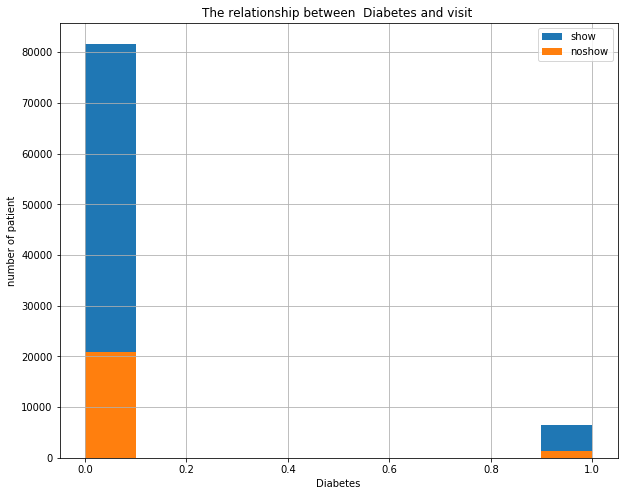

In [24]:
#chek the relationship between the   Diabetes and  visit
bar_plot('Diabetes' ,'The relationship between  Diabetes and visit ','Diabetes')

Diabetes is insignificant

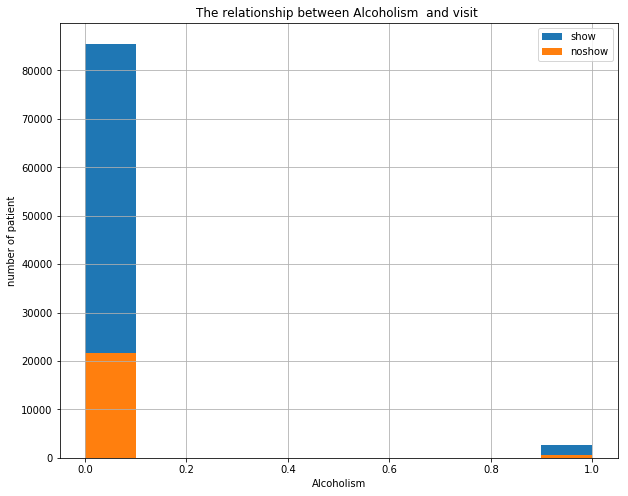

In [25]:
#chek the relationship between the Alcoholism  and visit
bar_plot('Alcoholism','The relationship between Alcoholism  and visit ', 'Alcoholism')

Alcoholism  is insignificant

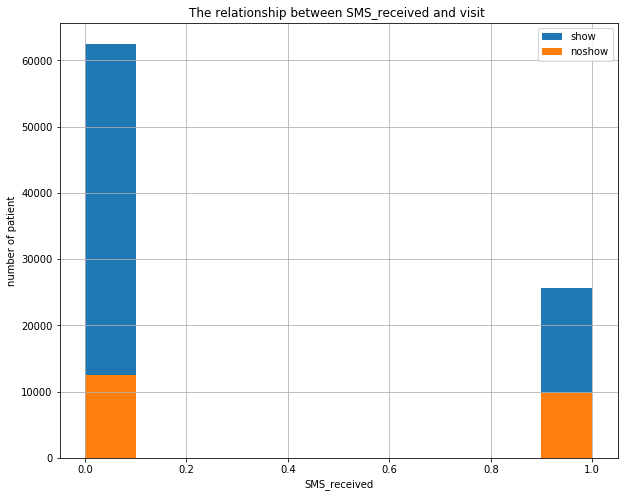

In [26]:
#chek the relationship between the SMS_received and visit
bar_plot('SMS_received','The relationship between SMS_received and visit ','SMS_received')

patients who didnt recieved SMS showed more than who did !!

<a id='conclusions'></a>
## Conclusions

**most of the Young patients are showed

**patients who didnt recieved SMS showed more than who did

### Limitations

*We couldn't find a firing relationship between most of columns and patients showing or not 

## Submitting your Project 

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

Thanks 